# Plotting of Evaluation Results: Decision Times

Compare number of decisions and time for decisions between different algorithms.
Take decisions per flow, node, and in total into account.

In [107]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.display import display

result_dir = 'decision_results'
rep = '60'
config = 'hc'
network = 'dfn_58.graphml'
ingresses = ['0.3']
algos = ['gpasp', 'spr2', 'bjointsp', 'bjointsp_recalc']
labels = ['Greedy', 'Score', 'B-JointSP', 'B-JointSP Re.']

In [108]:
df = None
for i, algo in enumerate(algos):
    for ing in ingresses:
        df_tmp = pd.read_csv(f'{result_dir}/{rep}/{config}/{network}/{ing}/{algo}/agg_decisions.csv')
        df_tmp['algorithm'] = labels[i]
        # create df for first algo
        if df is None:
            df = df_tmp.copy()
        # then append
        else:
            df = df.append(df_tmp)
        
df.head()

,flow,node,dec_count,dec_time_avg,dec_time_std,algorithm
0,1,pop0,2,0.000186,0.000009,Greedy
1,1,pop1,1,0.000187,0.000000,Greedy
2,1,pop53,3,0.000185,0.000006,Greedy
3,1,pop50,2,0.000265,0.000078,Greedy
4,1,pop14,1,0.000185,0.000000,Greedy


In [109]:
# total decisions per algo
df_sum_total = df.groupby('algorithm').sum().reset_index().drop(columns=['flow'])
df_sum_total

,algorithm,dec_count,dec_time_avg,dec_time_std
0,B-JointSP,4487,809.564816,0.000000
1,B-JointSP Re.,6237,783.110461,13.120893
2,Greedy,44274,5.082745,0.514045
3,Score,39340,32.858386,29.508450


In [110]:
# per node decisions per algo
df_sum_by_node = df.groupby(['algorithm', 'node']).sum().drop(columns=['flow'])
# display(df_sum_by_node)
df_sum_by_node = df_sum_by_node.groupby('algorithm').mean().reset_index()
df_sum_by_node_std = df_sum_by_node.groupby('algorithm').std().reset_index()
df_sum_by_node

,algorithm,dec_count,dec_time_avg,dec_time_std
0,B-JointSP,4487.000000,809.564816,0.000000
1,B-JointSP Re.,6237.000000,783.110461,13.120893
2,Greedy,763.344828,0.087634,0.008863
3,Score,819.583333,0.684550,0.614759


In [111]:
# per flow decisions per algo
df_sum_by_flow = df.groupby(['algorithm', 'flow']).sum()
# display(df_sum_by_flow)
df_sum_by_flow = df_sum_by_flow.groupby('algorithm').mean().reset_index()
df_sum_by_flow_std = df_sum_by_flow.groupby('algorithm').std().reset_index()
df_sum_by_flow

,algorithm,dec_count,dec_time_avg,dec_time_std
0,B-JointSP,1.000000,0.180425,0.000000
1,B-JointSP Re.,1.435113,0.180191,0.003019
2,Greedy,9.929132,0.001140,0.000115
3,Score,8.864353,0.007404,0.006649


In [112]:
# concat dfs for long format
df_sum_total['agg'] = 'Total'
df_sum_by_node['agg'] = 'Per Node'
df_sum_by_flow['agg'] = 'Per Flow'
df_all = df_sum_total.append([df_sum_by_flow, df_sum_by_node])
df_all


,algorithm,dec_count,dec_time_avg,dec_time_std,agg
0,B-JointSP,4487.000000,809.564816,0.000000,Total
1,B-JointSP Re.,6237.000000,783.110461,13.120893,Total
2,Greedy,44274.000000,5.082745,0.514045,Total
3,Score,39340.000000,32.858386,29.508450,Total
0,B-JointSP,1.000000,0.180425,0.000000,Per Flow
1,B-JointSP Re.,1.435113,0.180191,0.003019,Per Flow
2,Greedy,9.929132,0.001140,0.000115,Per Flow
3,Score,8.864353,0.007404,0.006649,Per Flow
0,B-JointSP,4487.000000,809.564816,0.000000,Per Node
1,B-JointSP Re.,6237.000000,783.110461,13.120893,Per Node


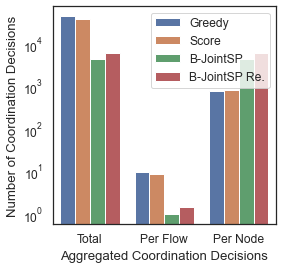

In [115]:
# plot num decisions
fig, ax = plt.subplots(figsize=(4, 4))
sns.set(font_scale=1.1, style='white')

sns.barplot('agg', 'dec_count', hue='algorithm', hue_order=labels, data=df_all, ax=ax)
ax.set_xlabel('Aggregated Coordination Decisions')
ax.set_ylabel('Number of Coordination Decisions')
ax.set_yscale('log')

# remove legend title
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels)
    

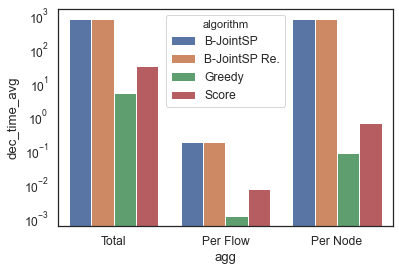

In [114]:
# plot runtimes
ax = sns.barplot('agg', 'dec_time_avg', hue='algorithm', data=df_all)
ax.set_yscale('log')